# PREGUNTA 1

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
creal = pd.read_csv('costo_marginal_real.csv')
cprogr = pd.read_csv('costo_marginal_programado.csv')

#### Para hacer el Merge, hay que hacerlo por nombre de barra, fecha y hora.

In [3]:
cmarg = pd.merge(creal,cprogr ,left_on=['barra_mnemotecnico','fecha','hora'],right_on=['mnemotecnico_barra','fecha','hora'] )

#### Para ver como distribuyen las distintas variables, se analizaran por hora. 

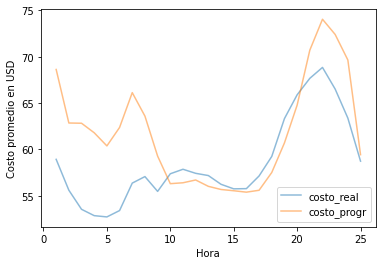

In [4]:
xreal=cmarg.groupby(['hora']).mean()['costo_en_dolares']
yprogr=cmarg.groupby(['hora']).mean()['costo']
plt.plot(xreal, alpha=0.5, label='costo_real')
plt.plot(yprogr, alpha=0.5, label='costo_progr')
plt.legend(loc='lower right')
plt.xlabel("Hora")
plt.ylabel("Costo promedio en USD")
plt.show()

#### Podemos ver que existe una desviación entre el costo programado y el costo real, la cual se acentua más en los horarios de noche. A continucion veremos el costo promedio por barra , tanto programado como real. 

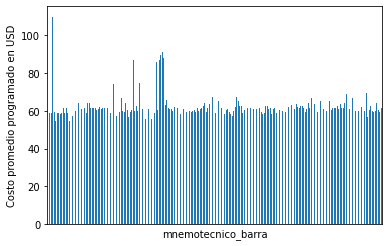

In [5]:
cmarg.groupby(['mnemotecnico_barra']).mean()['costo'].plot(kind="bar")
plt.ylabel("Costo promedio programado en USD")
plt.xticks([])
plt.show()

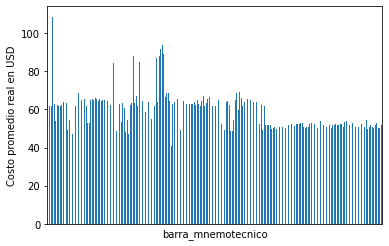

In [6]:
cmarg.groupby(['barra_mnemotecnico']).mean()['costo_en_dolares'].plot(kind="bar")
plt.ylabel("Costo promedio real en USD")
plt.xticks([])
plt.show()

##### Para los graficos ateriores se decide eliminar los datos de la leyenda del eje x , ya que solo ensuciaban el grafico. 

In [7]:
breal=creal["barra_mnemotecnico"].nunique()
bprog=cprogr["mnemotecnico_barra"].nunique()
brealprog=cmarg["mnemotecnico_barra"].nunique()
porcentaje=brealprog*100/breal

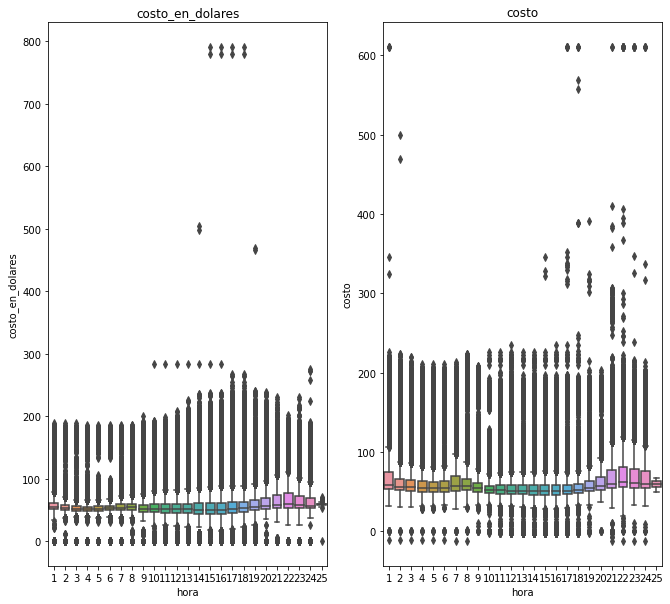

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(11, 10), sharex=True)
for nombre, eje in zip(['costo_en_dolares','costo'], ax):
    sns.boxplot(data=cmarg,x='hora',y=nombre,ax=eje)
    eje.set_title(nombre)
    

##### Primero podemos ver  que existen 1020 barras reales, y solamente 239 barras programadas. De las 1020 barras reales solo 220 de ellas estan programadas, es decir solo el 21,5%. Ademas las barras tienen un costo promedio tanto programado como real diferentes entre ellas. Tanto los costos reales como programados tienen una gran desviación dentro de la misma hora. 

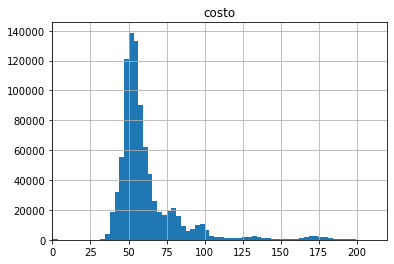

In [10]:
cmarg.hist(column="costo",bins=200)
plt.xlim(0,220)
plt.show()

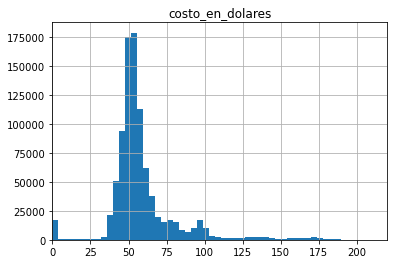

In [11]:
cmarg.hist(column="costo_en_dolares",bins=200)
plt.xlim(0,220)
plt.show()

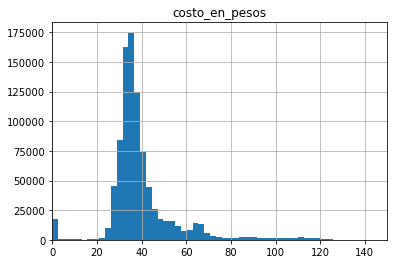

In [12]:
cmarg.hist(column="costo_en_pesos",bins=200)
plt.xlim(0,150)
plt.show()

##### Tanto el costo real como el costo programado siguen una distribucion normal 

# PREGUNTA 2

In [13]:
cmarg['desviacion']= cmarg['costo_en_dolares']-cmarg['costo']
cmarg['desviacion_pct']= cmarg['desviacion']*100/cmarg['costo']
cmarg["desviacion_cat"]=0

In [14]:
cmarg.loc[abs(cmarg["desviacion_pct"])>15,"desviacion_cat"]=1   
cmarg.loc[abs(cmarg["desviacion_pct"])<=15,"desviacion_cat"]=0 

##### Sumaremos por fecha la desviacion categorica, para ver como se comporta esta variable en el tiempo. 

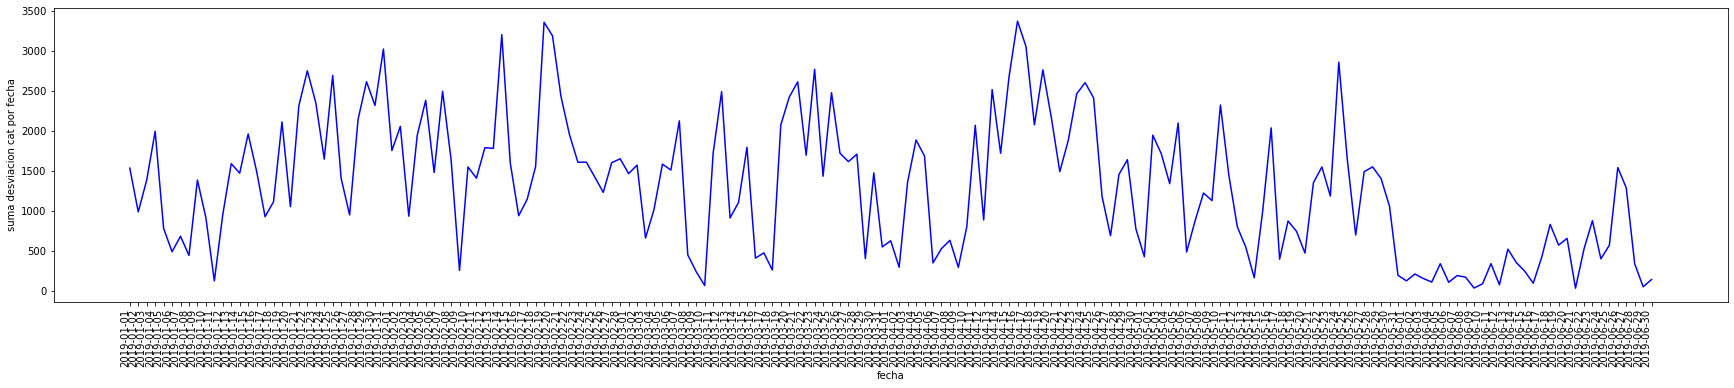

In [15]:

c=cmarg.groupby(["fecha"])["desviacion_cat"].sum()

fig, ax = plt.subplots(1, figsize=(30, 6))
ax.plot(c, color="blue", label="costo real")
plt.xlabel("fecha")
plt.ylabel("suma desviacion cat por fecha")
fig.autofmt_xdate(rotation=90)
plt.show()



##### Se observa que la desviación no sigue un patron por fecha, sin embargo en el ultimo mes la desviacion a tendido a disminuir 

# PREGUNTA 3

In [16]:
def time_plot_costo_barra(codigo_barra,tiempo_inicial,tiempo_final):
    datos_barra=cmarg[(cmarg["barra_mnemotecnico"]==codigo_barra) & (cmarg["fecha"]>=tiempo_inicial) & (cmarg["fecha"]<=tiempo_final)]

    cmg_real=datos_barra.groupby(["fecha"]).mean()["costo_en_dolares"]
    cmg_prog=datos_barra.groupby(["fecha"]).mean()["costo"]
    
    
    fig, ax = plt.subplots(1, figsize=(30, 6))
 
    fig.suptitle('Costo real y marginal', fontsize=15)
    ax.plot(cmg_real, color="red", label="costo real")
    ax.plot(cmg_prog, color="orange", label="costo programado")
    ax.set_xlim(tiempo_inicial, tiempo_final)
    
    
    plt.xlabel("fecha")
    plt.ylabel("Costo en USD")
    plt.legend(loc="upper left", frameon=False)
    fig.autofmt_xdate(rotation=90)
    plt.show()
    

##### A continuacion se grafica el costo real y programado por fecha para 4 diferentes barras. 

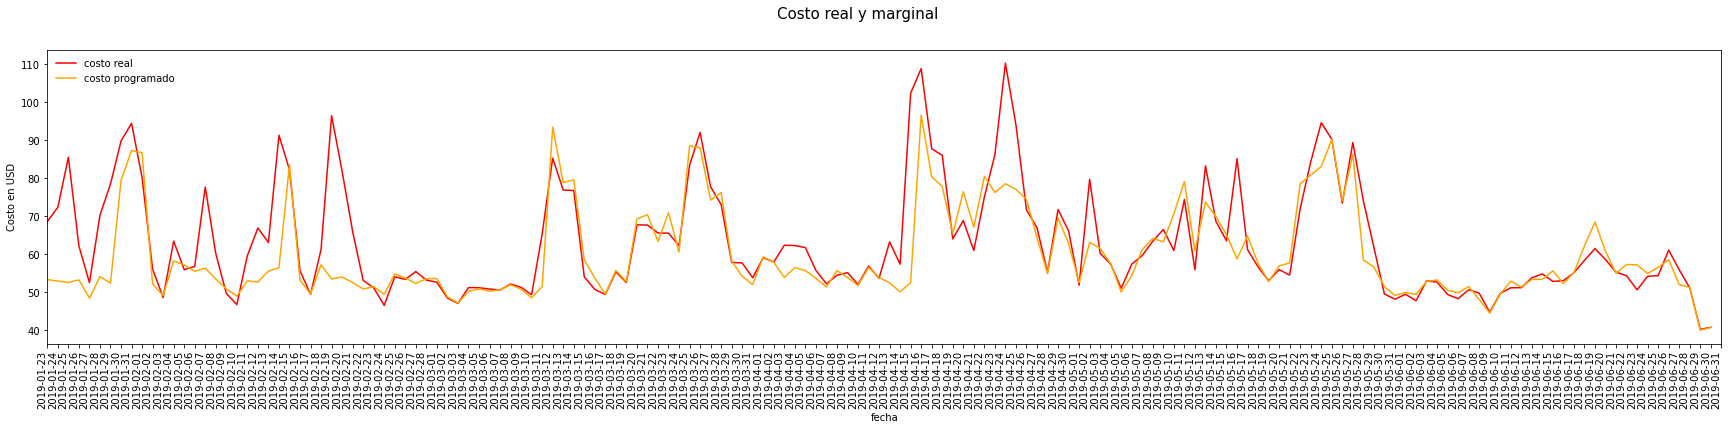

In [17]:
time_plot_costo_barra("BA01G021SE018G021","2019-01-23","2019-06-31")

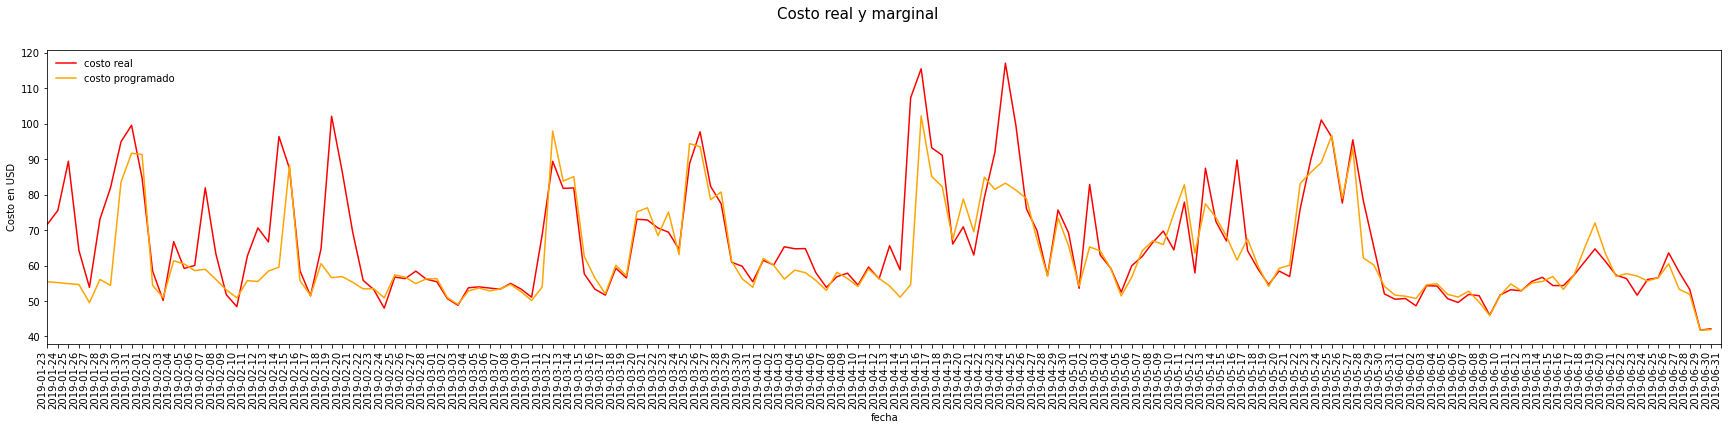

In [18]:
time_plot_costo_barra("BA01R002SE041R002","2019-01-23","2019-06-31")

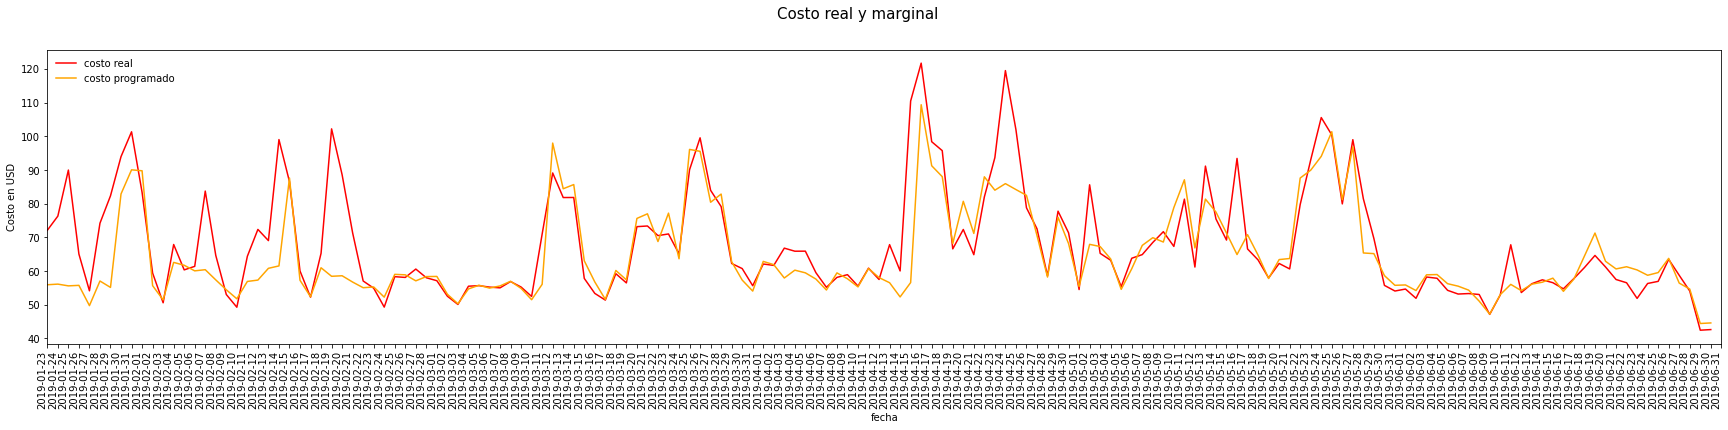

In [19]:
time_plot_costo_barra("BA02T005SE055T005","2019-01-23","2019-06-31")

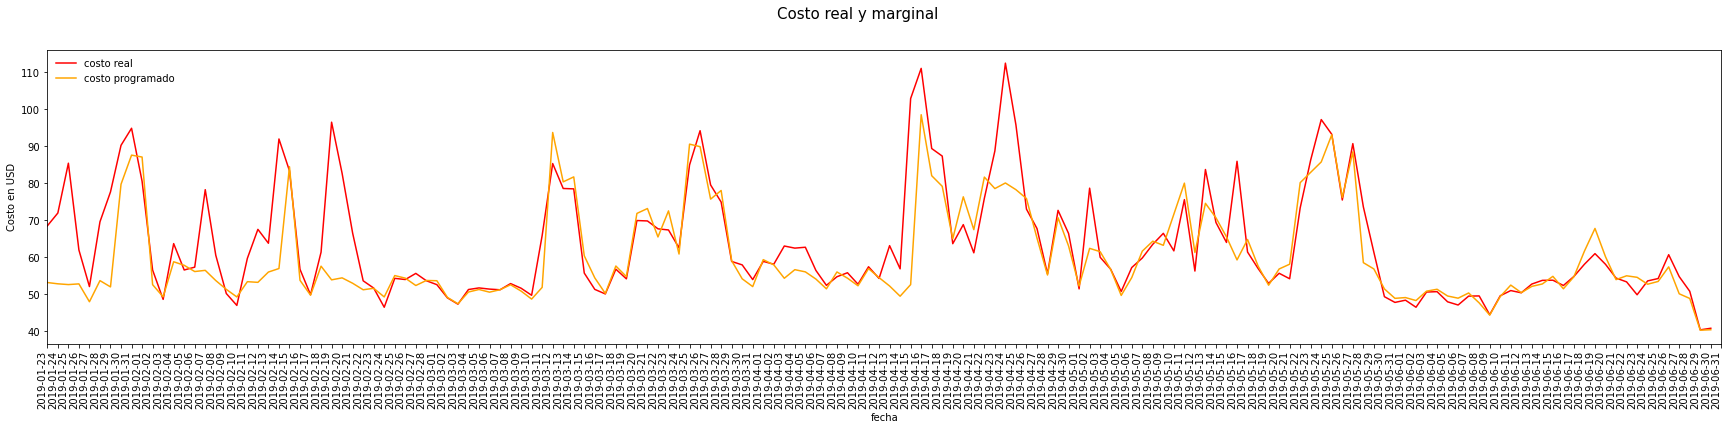

In [20]:
time_plot_costo_barra("BA01T002SE029T002","2019-01-23","2019-06-31")

##### Se observa que por lo general el costo programado y real tiene una variación, sin embargo ambos costos siguen la misma tendencia. Entre el 18 y 24 de febrero, para todas las barras se observa una diferencia importante entre ambos costos.

##### A continuación identifico las barras que tienen valor 0 todos los dias como costo real y las elimino.

In [21]:
barras=cmarg.groupby("barra_mnemotecnico").agg({'costo_en_dolares':'sum', 'costo' :'sum'}).reset_index()
barras[barras['costo_en_dolares']==0]["barra_mnemotecnico"]


11    BA01G049SE001G049
Name: barra_mnemotecnico, dtype: object

In [22]:
indexB= cmarg[cmarg["barra_mnemotecnico"]=='BA01G049SE001G049'].index
cmarg.drop(indexB , inplace=True)

# PREGUNTA 4

In [2]:
base= pd.read_csv('base_para_prediccion.csv')

In [24]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112779 entries, 0 to 112778
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nemotecnico_se            112779 non-null  object 
 1   fecha                     112779 non-null  object 
 2   hora                      112779 non-null  int64  
 3   gen_eolica_total_mwh      0 non-null       float64
 4   gen_geotermica_total_mwh  0 non-null       float64
 5   gen_hidraulica_total_mwh  34184 non-null   float64
 6   gen_solar_total_mwh       41818 non-null   float64
 7   gen_termica_total_mwh     61863 non-null   float64
 8   cmg_real                  112779 non-null  float64
 9   cmg_prog                  112779 non-null  float64
 10  cmg_desv                  112779 non-null  float64
 11  cmg_desv_pct              112779 non-null  float64
 12  n_barras                  112779 non-null  int64  
 13  demanda_mwh               112779 non-null  i

In [25]:
base.isnull().sum()  

nemotecnico_se                   0
fecha                            0
hora                             0
gen_eolica_total_mwh        112779
gen_geotermica_total_mwh    112779
gen_hidraulica_total_mwh     78595
gen_solar_total_mwh          70961
gen_termica_total_mwh        50916
cmg_real                         0
cmg_prog                         0
cmg_desv                         0
cmg_desv_pct                     0
n_barras                         0
demanda_mwh                      0
cap_inst_mw                      0
dtype: int64

##### Observamso que todos los datos de generacion de energía eolica y gotermica son Nulos. 

In [26]:
base["nemotecnico_se"].nunique()

29

In [27]:
base[["cmg_real","cmg_prog","cmg_desv","cmg_desv_pct"]].describe()

,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct
count,112779.000000,112779.000000,112779.000000,112779.00
mean,61.170058,62.215400,-1.045338,inf
std,25.414147,25.307759,24.711575,NaN
min,0.000000,-1.713131,-562.470000,-3403.97
25%,49.130000,49.906745,-3.790000,-7.07
50%,54.610000,55.420601,-0.310000,-0.58
75%,63.500000,64.701951,1.670000,2.92
max,240.360000,610.600000,175.020000,inf


In [28]:
base["fecha"].min()

'2019-01-01 00:00:00 UTC'

In [29]:
base["fecha"].max()

'2019-06-30 00:00:00 UTC'

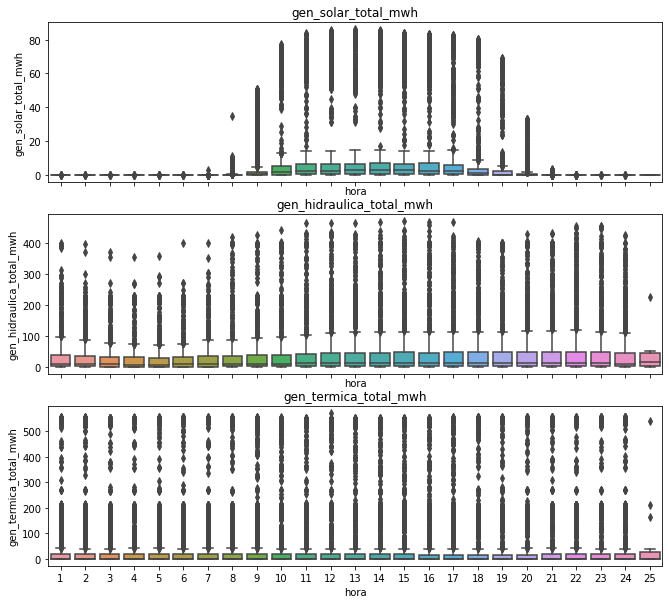

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for nombre, eje in zip(['gen_solar_total_mwh','gen_hidraulica_total_mwh','gen_termica_total_mwh'], ax):
    sns.boxplot(data=base,x='hora',y=nombre,ax=eje)
    eje.set_title(nombre)


##### Se observa que los datos presentados son del tipo numerico y objetos. El dataset cuenta con 112779 entradas y 15 columnas ( variables). 
##### El dataset viene cn 29 barras unicas, las cuales tienen datos desde el 1ero de enero al 30 de Junio, separadas por horas del dia.  
##### La generación eolica asi como la generación termica no incluyen datos. Solo se entregan datos para la generación terminca, solar e hidraulica. La generación termica e hidraulica son las que mas producen energía en promedio. Como era de esperarse la energía solar presenta estacionalidad ( mayor producción en horarios diurnos ) 

##### Por otra parte la desviacion porcentual tiene valores infinitos ya que el valor del costo es igual a 0 para ciertas barras. 

In [3]:
base['fecha'] = pd.to_datetime(base.fecha)
base["semana_año"]=base["fecha"].dt.week
base["dia_semana"]=base["fecha"].dt.weekday # parte del 0 (lunes) a 6 (domingo)
base["dia_calendario"] = (base["fecha"]-base["fecha"].min()).dt.days
base["año"]=base["fecha"].dt.year
base["mes"]=base["fecha"].dt.month
base["dia"]=base["fecha"].dt.day
base.loc[base["dia_semana"]<5,"fds"]=1 # se utilizara el numero 1 para weekday
base.loc[base["dia_semana"]>=5,"fds"]=0 # se usara el numero 0 para "weekend"
base['fecha'] = base['fecha'].dt.strftime('%Y-%m-%d')

In [33]:
def plot_estaciones(codigo_subestacion,variable,fechas):
    datos_base=base[(base["nemotecnico_se"]==codigo_subestacion)]
    numplot=len(fechas)
    fig,ax= plt.subplots(1,numplot,figsize=(30, 6))
    plt.tight_layout()
    ploteo=datos_base.groupby(["hora"]).mean()[variable]

    for i in range(0,numplot):
        ax[i].plot(ploteo,color="red",label=fechas[i])
        ax[i].set_title(fechas[i])
     
    fig.text(0.5, 0, 'HORAS', ha='center')
    fig.text(0, 0.5, variable , va='center', rotation='vertical')
    plt.show()


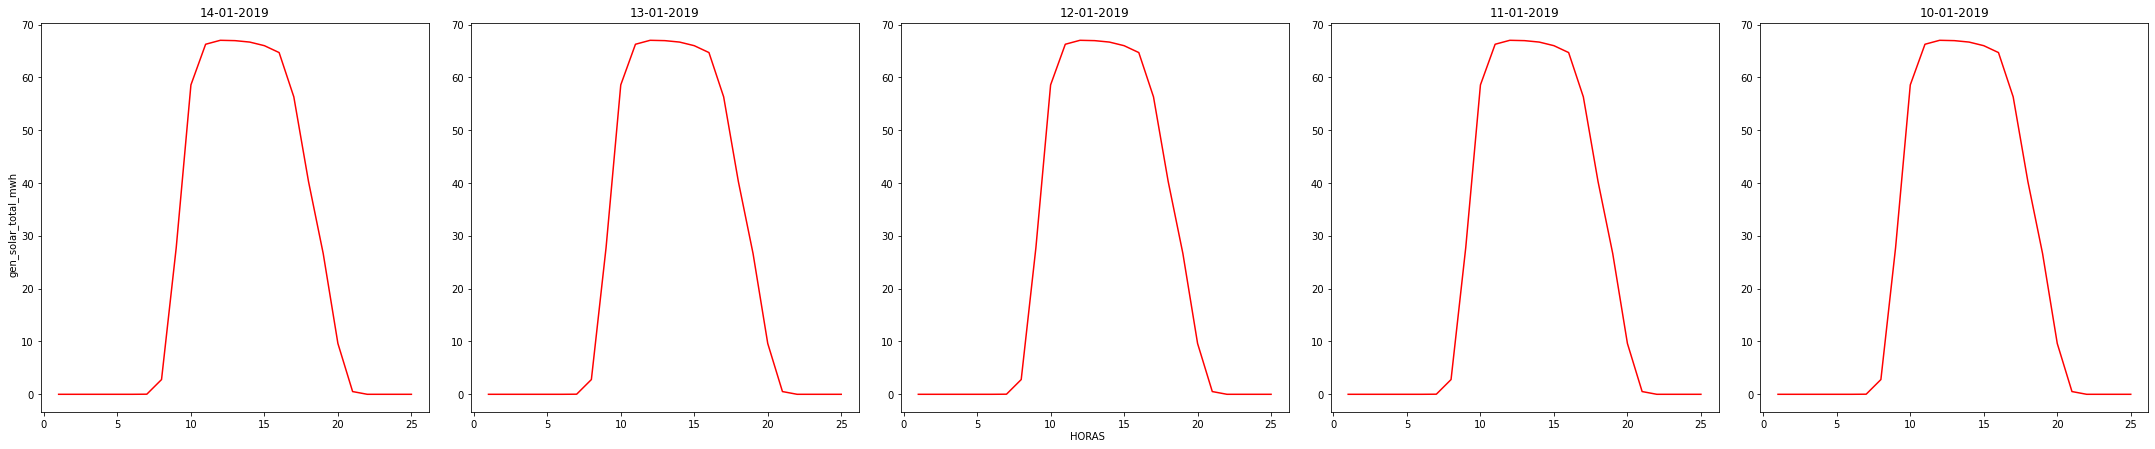

In [34]:
codigo_sub="SE005T002"
var="gen_solar_total_mwh"
fech=["14-01-2019","13-01-2019","12-01-2019","11-01-2019","10-01-2019"]
plot_estaciones(codigo_sub,var,fech)

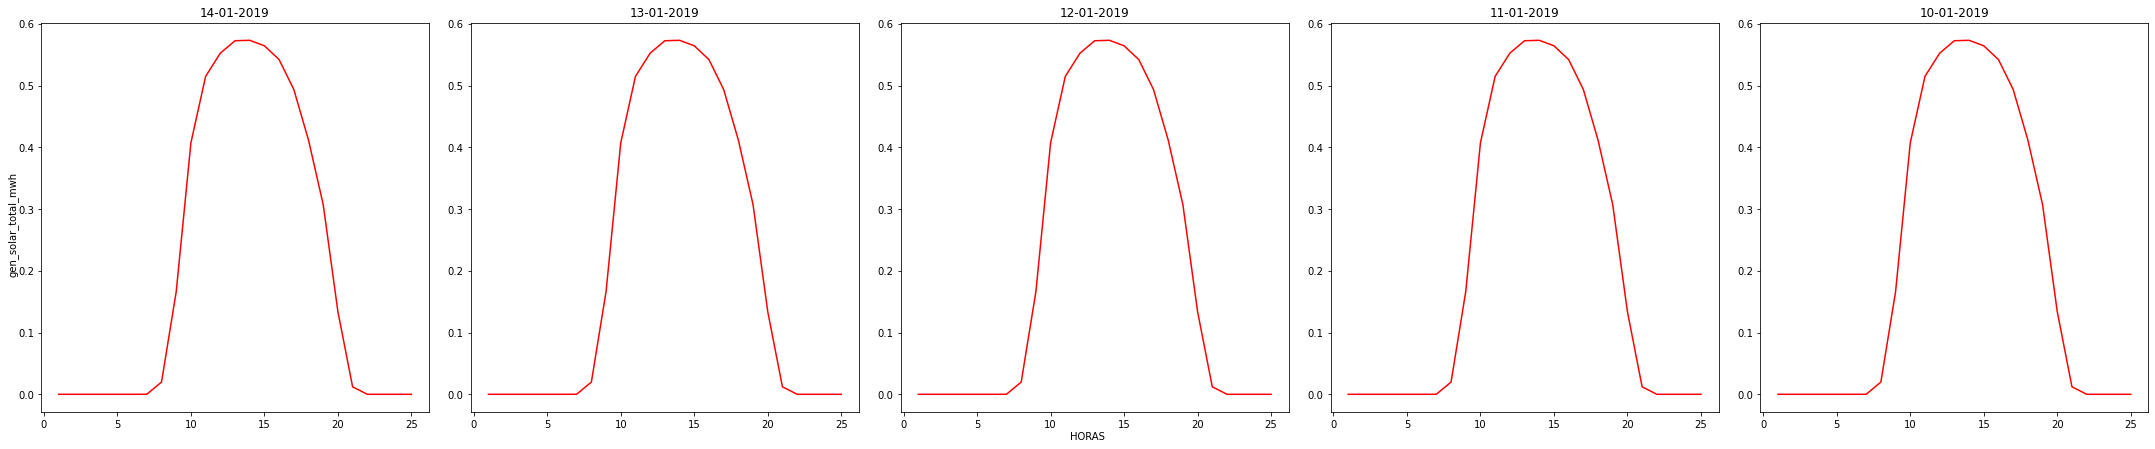

In [35]:
codigo_sub="SE127T005"
var="gen_solar_total_mwh"
fech=["14-01-2019","13-01-2019","12-01-2019","11-01-2019","10-01-2019"]
plot_estaciones(codigo_sub,var,fech)

##### Según lo que observamos de estas dos subestaciones es que la generación de energía solar  es nula durante la noche y llega a su maximo cercano al medio día, como era de esperarse. Cada estación por si sola sigue la misma tendencia durante los días observados. Sin embargo una de las estaciones produce mayor energía que la otra. Esto podría deberse a factores geograficos/climaticos ( presencia de nubes por ejemplo), asi como del tamaño de la estación.

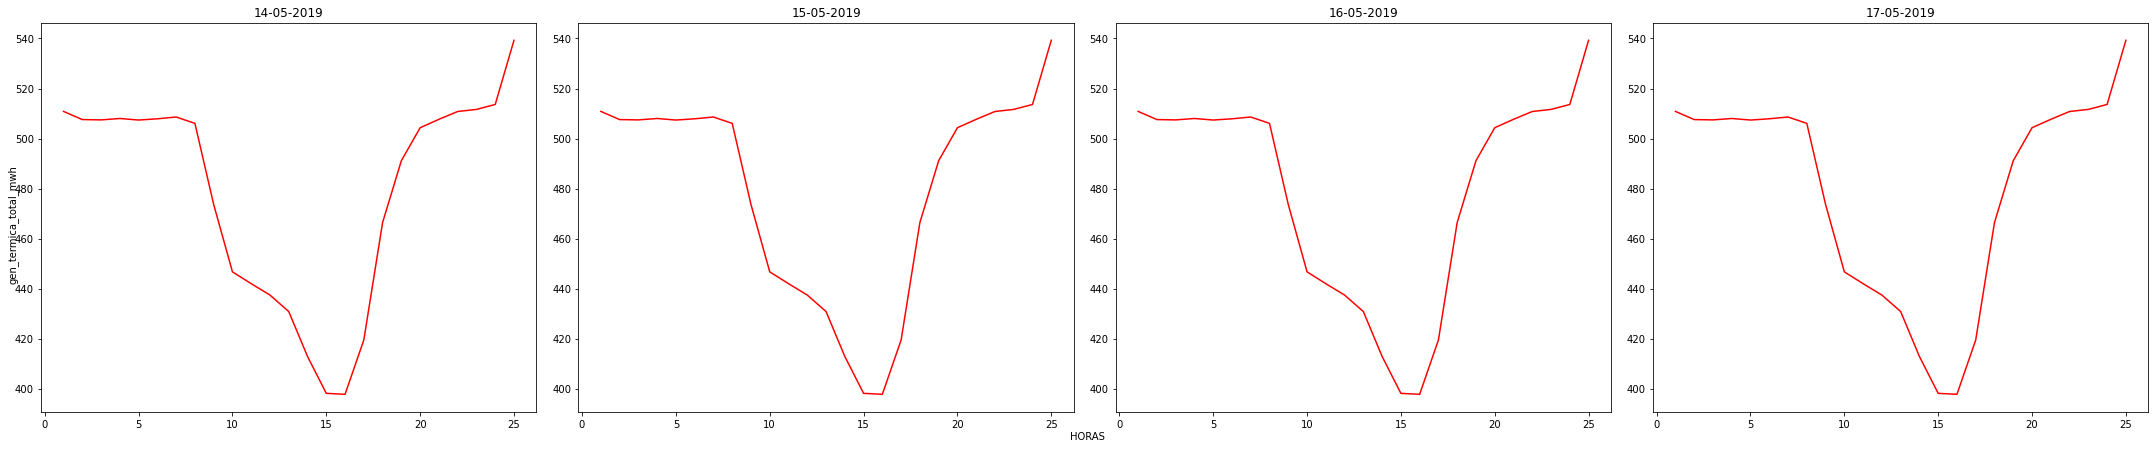

In [36]:
codigo_sub="SE020G213"
var="gen_termica_total_mwh"
fech=["14-05-2019","15-05-2019","16-05-2019","17-05-2019"]
plot_estaciones(codigo_sub,var,fech)

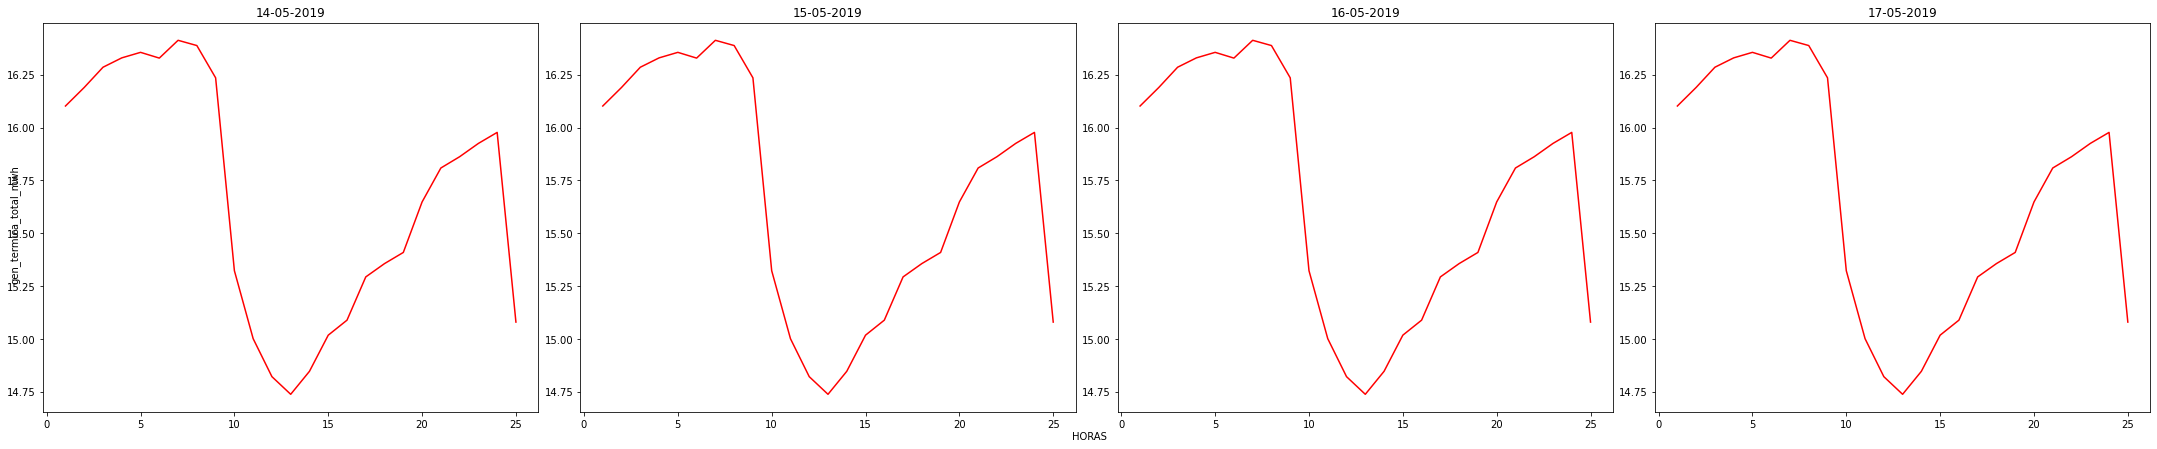

In [37]:
codigo_sub="SE106G216"
var="gen_termica_total_mwh"
fech=["14-05-2019","15-05-2019","16-05-2019","17-05-2019"]
plot_estaciones(codigo_sub,var,fech)

##### Según lo que observamos de estas dos subestaciones es que la generación de termica es menor durante el medio dá y aumenta progresivamente durante los periodos nocturnos y de madrugada.  Cada estación por si sola sigue la misma tendencia durante los días observados. Sin embargo una de las estaciones produce mayor energía que la otra. Esto podría deberse a diversos factores. Se observa que la producción de  energía termica es opuesta a la solar en cuanto a peaks de producción. 

# PREGUNTA 5

#### Voy a borrar los valores infinitos y la hora 25 para que no molesten en mi data.

In [4]:
indexC= base[base["cmg_desv_pct"]==np.inf].index
base.drop(indexC , inplace=True)
indexD= base[base["hora"]==25].index
base.drop(indexD , inplace=True)

In [5]:
base.loc[abs(base["cmg_desv_pct"])>15,"desviacion_cat"]=1   
base.loc[abs(base["cmg_desv_pct"])<=15,"desviacion_cat"]=0

#### Voy a llenar los NAN con 0,  para poder sumar el total de la producción. 

In [6]:
base = base.fillna(0)
base["en_total_mwh"]=base["gen_hidraulica_total_mwh"]+base["gen_solar_total_mwh"]+base["gen_termica_total_mwh"]+base["gen_eolica_total_mwh"]+base["gen_geotermica_total_mwh"]


##### A continuacion se muestran la variacion por hora de la desviación porcentual, según cada mes, y la variacion de la desviación por hora en promedio de todos mis datos

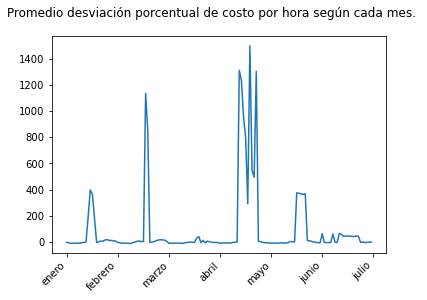

In [41]:
agrup=base.groupby(["mes","hora"])["cmg_desv_pct"].mean()
dia=[]

for i in range(0,len(agrup.values)):
    a=agrup.index[i][0]
    dia.append(a)

agrup=pd.DataFrame({"fecha":dia,"sum_desv_pct":agrup.values})

plt.plot(agrup["sum_desv_pct"])
new_xticks=["enero","febrero","marzo","abril","mayo","junio","julio"]
plt.xticks(range(0,145,24),new_xticks, rotation=45, horizontalalignment='right')
plt.suptitle("Promedio desviación porcentual de costo por hora según cada mes. ")
plt.show()
fig.text(0.5, 0, 'HORAS', ha='center')

plt.show()

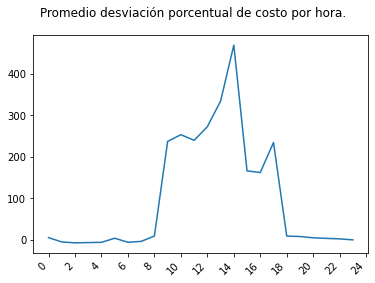

19075.43405315197

In [42]:
agrup=base.groupby(["hora"])["cmg_desv_pct"].mean()

agrup=pd.DataFrame({"fecha":agrup.index,"cmg_desv_pct":agrup.values})

plt.plot(agrup["cmg_desv_pct"])
plt.xticks(range(0,25,2), rotation=45, horizontalalignment='right')
plt.suptitle("Promedio desviación porcentual de costo por hora. ")
plt.show()

np.mean(agrup["cmg_desv_pct"])
np.var(agrup["cmg_desv_pct"])

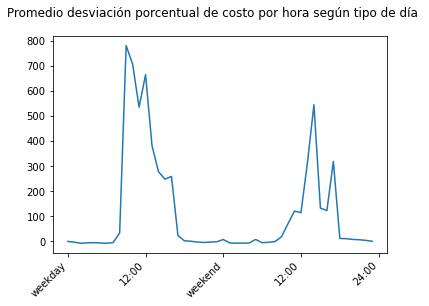

43759.18423065991

In [43]:
agrup=base.groupby(["fds","hora"])["cmg_desv_pct"].mean()
dia=[]

for i in range(0,len(agrup.values)):
    a=agrup.index[i][0]
    dia.append(a)

agrup=pd.DataFrame({"fecha":dia,"sum_desv_cat":agrup.values})

plt.plot(agrup["sum_desv_cat"])
plt.xticks(range(0,50,12),["weekday","12:00","weekend","12:00","24:00"], rotation=45, horizontalalignment='right')
plt.suptitle("Promedio desviación porcentual de costo por hora según tipo de día ")
plt.show()

np.mean(agrup["sum_desv_cat"])
np.var(agrup["sum_desv_cat"])

##### A partir de esto se observa que para todas las distribuciones de datos, vemos que la desviación porcentual de mis costos es significativamente mayor duranre el día ( mas cercano a medio día) que durante la noche. Durante la noche la desviación porcentual de mis costos es constante, tanto en la semana como en el fin de semana.

##### A continuación analizaremos como se comparta la energía total producida por hora. 

In [44]:
producion=base.groupby(["mes","hora"])["en_total_mwh"].mean()
dia=[]

for i in range(0,len(producion.values)):
    a=producion.index[i][0]
    dia.append(a)

producion=pd.DataFrame({"fecha":dia,"en_total_mwh":producion.values})


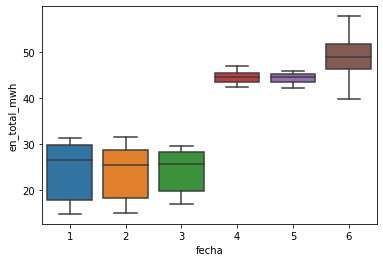

In [45]:
sns.boxplot(data=producion,x='fecha',y='en_total_mwh')

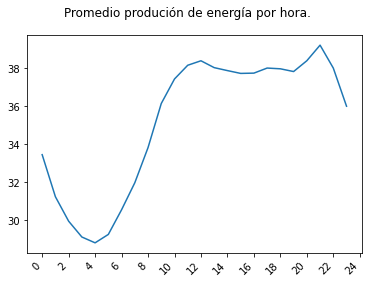

In [46]:
agrup=base.groupby(["hora"])["en_total_mwh"].mean()

agrup=pd.DataFrame({"fecha":agrup.index,"prom_en_total_mwh":agrup.values})

plt.plot(agrup["prom_en_total_mwh"])
plt.xticks(range(0,25,2), rotation=45, horizontalalignment='right')
plt.suptitle("Promedio produción de energía por hora. ")
plt.show()


#### La producción de energía promedio por hora, en los ultimos tres meses tiene una menor varianza que la de los primeros 3 meses. Por otra parte la desviacion porcentual de costos es mayor durante las horas cercanas al medio día, horas en donde esta presente la estacionalidad de la generación de energía solar. 

##### Observaremos como se relacionan las variables para ver que tipo de modelo podemos usar. Además cambio mi variable target. Sera 1 cuando la desv_pct del dia es mayor o menos a 15%. Esto lo hago para no ver el problema por barras, si no como un todo.

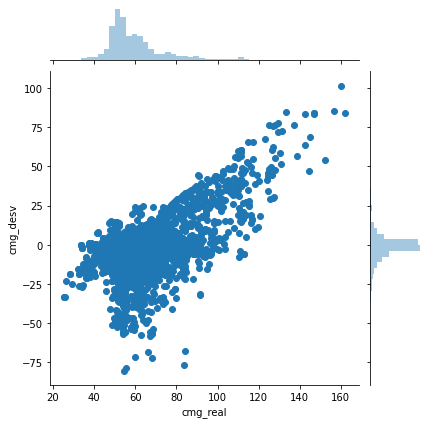

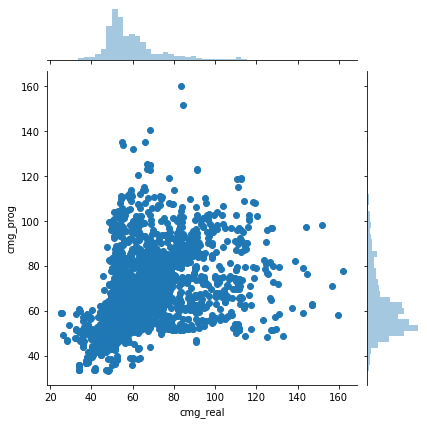

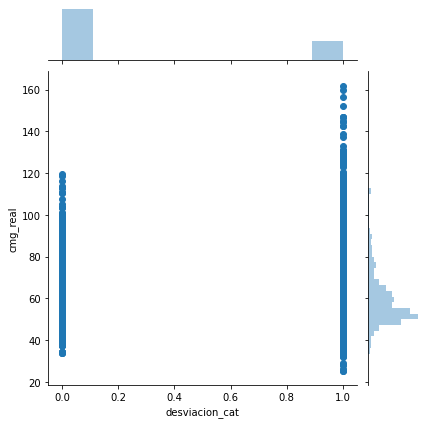

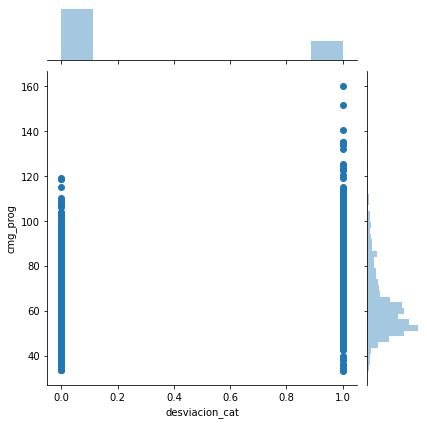

In [73]:
relacion=base.groupby(["fecha","hora"]).mean()

dia=[]
hora=[]

for i in range(0,len(relacion.values)):
    a=relacion.index[i][0]
    b=relacion.index[i][1]
    dia.append(a)
    hora.append(b)


relacion.loc[abs(relacion["cmg_desv"]*100/relacion["cmg_prog"])>15,"desviacion_cat"]=1
relacion.loc[abs(relacion["cmg_desv"]*100/relacion["cmg_prog"])<=15,"desviacion_cat"]=0
relacion["fecha"]=dia
relacion["hora"]=hora
sns.jointplot(x='cmg_real',y='cmg_desv',data=relacion)
sns.jointplot(x='cmg_real',y='cmg_prog',data=relacion)
sns.jointplot(y='cmg_real',x='desviacion_cat',data=relacion)
sns.jointplot(x='desviacion_cat',y='cmg_prog',data=relacion)


##### Se observa que el costo marginal real y su desviación son linearmente proporcionales. Además de que se observa  en el segundo gráfico la no linearidad entre el cmg real y programado al mismo tiempo que la varianza entre ellos. Por otra parte se puede inferir que a mayor cmg tanto real como programado mayor es la probabilidad de que la desviacion categorica sea 1. 

##### A continuación voy a generar mi modelo, en donde como vimos que las variables que influyen en mi desviación de costo son los costos reales,programados y la energia producida.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
X = relacion[['cmg_real', 'cmg_prog', 'gen_solar_total_mwh']]
y = relacion['desviacion_cat']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [77]:
predictions = logmodel.predict(X_test)

In [78]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.93      0.83      1024
         1.0       0.58      0.26      0.36       410

    accuracy                           0.74      1434
   macro avg       0.67      0.59      0.59      1434
weighted avg       0.71      0.74      0.70      1434

[[949  75]
 [305 105]]


##### Se obtuvo una exactitud del modelo del 74% lo cual si bien no esta mal, se podría mejorar.La precision del modelo es del 71% por lo que el modelo no es muy preciso en la predicción. 

# PREGUNTA 6 

##### Si me dicen que me enviaran la información cada 12 horas, debo cambiar mi variable target y voy a ver la variación diaria de mi variable target.

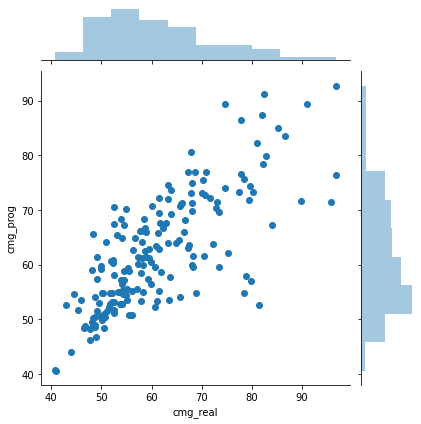

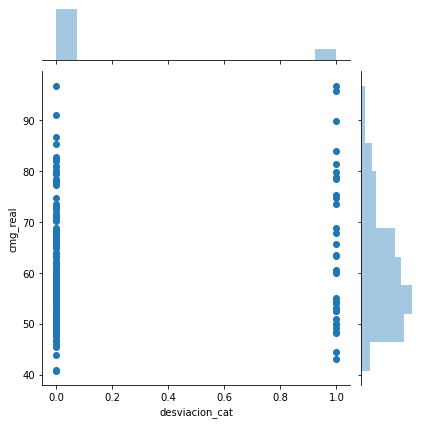

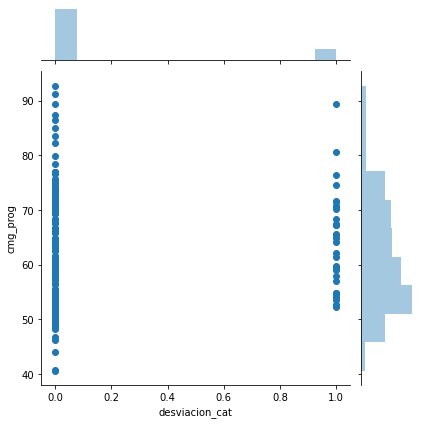

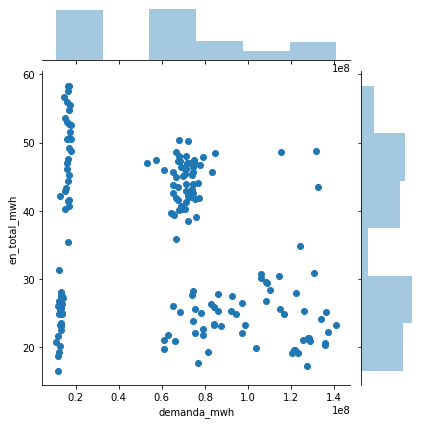

In [85]:
relacion2=base

    
relacion2=relacion2.groupby(["fecha"]).mean()
relacion2=pd.DataFrame(relacion2)
relacion2.loc[abs(relacion2["cmg_desv"]*100/relacion2["cmg_prog"])>15,"desviacion_cat"]=1
relacion2.loc[abs(relacion2["cmg_desv"]*100/relacion2["cmg_prog"])<=15,"desviacion_cat"]=0
sns.jointplot(x='cmg_real',y='cmg_prog',data=relacion2)
sns.jointplot(y='cmg_real',x='desviacion_cat',data=relacion2)
sns.jointplot(x='desviacion_cat',y='cmg_prog',data=relacion2)
sns.jointplot(x='demanda_mwh',y='en_total_mwh',data=relacion2)



In [86]:
X = relacion2[['cmg_real', 'cmg_prog', "gen_solar_total_mwh"]]
y = relacion2['desviacion_cat']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [88]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [89]:
predictions = logmodel.predict(X_test)

In [90]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        49
         1.0       0.00      0.00      0.00        11

    accuracy                           0.82        60
   macro avg       0.41      0.50      0.45        60
weighted avg       0.67      0.82      0.73        60

[[49  0]
 [11  0]]


C:\Users\4370721\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### El modelo ahora entrega una mayor exactitud , del 82%. Esto se debe principalmente a que los datos entre a mayor escala los vemos, menos varianza presentan entre ellos y mas correlacionados estan. Sin embargo el modelo es menos preciso.

# PREGUNTA 7 

In [103]:
clima=pd.read_csv("datos_clima.csv")

In [112]:
clima['fecha'] = pd.to_datetime(base.fecha)
clima['fecha'] = clima['fecha'].dt.strftime('%Y-%m-%d')

In [118]:
bd=pd.merge(base,clima,left_on=["nemotecnico_se","fecha"],right_on=["subestacion","fecha"])

In [119]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112030 entries, 0 to 112029
Data columns (total 43 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   nemotecnico_se            112030 non-null  object 
 1   fecha                     112030 non-null  object 
 2   hora                      112030 non-null  int64  
 3   gen_eolica_total_mwh      112030 non-null  float64
 4   gen_geotermica_total_mwh  112030 non-null  float64
 5   gen_hidraulica_total_mwh  112030 non-null  float64
 6   gen_solar_total_mwh       112030 non-null  float64
 7   gen_termica_total_mwh     112030 non-null  float64
 8   cmg_real                  112030 non-null  float64
 9   cmg_prog                  112030 non-null  float64
 10  cmg_desv                  112030 non-null  float64
 11  cmg_desv_pct              112030 non-null  float64
 12  n_barras                  112030 non-null  int64  
 13  demanda_mwh               112030 non-null  i

#### Para manejar  el Data Leakage, en este caso, primero solo voy a entrenar mi modelo con variables que realmente influyan en el y con variables que creo podría obtener en un dataset normal cuando tenga que usar mi modelo. No quiero usar variables que no voy a tener disponibles de constante y no quiero entrenar mi modelo con esto ya que osino va a generar que sea muy falsi-optimista.

In [121]:
bd=bd.groupby(["fecha"]).mean()
bd=pd.DataFrame(bd)
bd.loc[abs(bd["cmg_desv"]*100/bd["cmg_prog"])>15,"desviacion_cat"]=1
bd.loc[abs(bd["cmg_desv"]*100/bd["cmg_prog"])<=15,"desviacion_cat"]=0


In [158]:
X = bd[['cmg_real', 'cmg_prog', 'gen_solar_total_mwh','TS','T2M_MAX','T2M_MIN']]
y = bd['desviacion_cat']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [160]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [161]:
predictions = logmodel.predict(X_test)

In [162]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        49
         1.0       1.00      0.09      0.17        11

    accuracy                           0.83        60
   macro avg       0.92      0.55      0.54        60
weighted avg       0.86      0.83      0.77        60

[[49  0]
 [10  1]]


##### El modelo mejora bastante su precision, esto se debe principalmente a los datos climaticos agregados que nos permiten ser mas precisos. La variable mas importante a mi parecer es la temperatura del suelo, que a mi parecer va a estar ligada con la generación de energía solar, la cual a su vez vimos que presentaba una mayor variabilidad e influía en la desviación de mi costo marginal. 

# PREGUNTA 8

#### Tener un modelo así sería bueno, ya que se prodría optimizar la producción de energía. Preveer cuando va a ser mas cara la producción de energía, y planificar una mayor producción  y  almacenaje cuando el costo es menor. Además se puede preveer la demanda por lo que se sabría la necesidad de almacenaje y el delta producción de energía que se tendría que producir. 


#### Un modelo así serviría para zonas donde la producción de energía es baja o donde hay pocas plantas energeticas y se debe planificar bien su producción, ya que la variabilidad en sus precios afetan aun más a esos usarios. 

##### Por otra parte, se podría utilizar en energías renovables, para optimizar su producción y uso de manera que sean aun más usadas. 